""""
## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 
"""


###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline
#import matplotlib.pyplot as plt

""""
## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.
"""

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col= "Timestamp", parse_dates=True, infer_datetime_format=True)

In [5]:
## Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [6]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =  pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col= "Timestamp", parse_dates=True, infer_datetime_format=True)

In [7]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [8]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp = bitstamp.fillna(0)

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $

bitstamp.loc[:,"Close"] = bitstamp.loc[:,"Close"].str.replace("$", "")

/Users/Nikki/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
#bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype("float")
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()
bitstamp = bitstamp.drop_duplicates()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.fillna(0)

In [13]:
# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:,"Close"] = coinbase.loc[:,"Close"].str.replace("$", "")

/Users/Nikki/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [124]:
# Convert the Close data type to a float
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

In [125]:
# Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
coinbase = coinbase.drop_duplicates()
coinbase

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [126]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:,3]
bitstamp_sliced

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.iloc[0:5]

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [127]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:,3]
coinbase_sliced

# Review the first five rows of the DataFrame
coinbase_sliced.iloc[0:5]

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [18]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [19]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

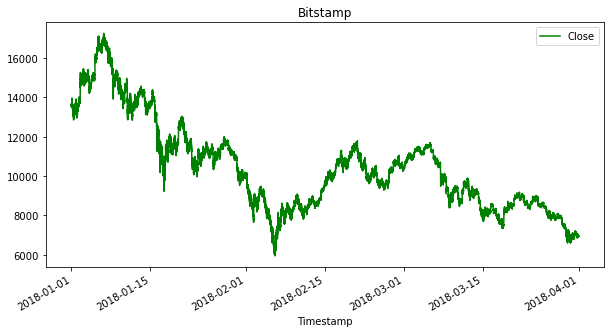

In [20]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp_sliced.plot(legend = True, figsize=(10,5), title = "Bitstamp", color ="green")
#plt.legend(["Close"])

The above graph shows a line plot of the bitstamp_sliced dataframe, which has the close of bitstamp over the course of four months, January through April. 

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

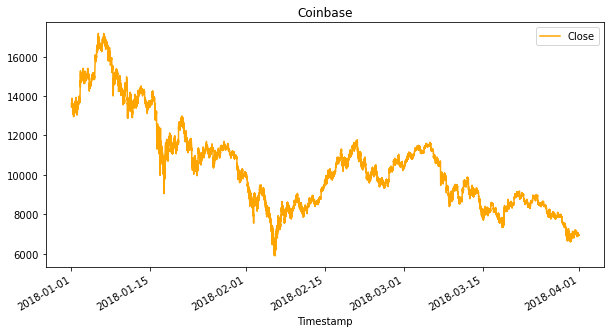

In [21]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase_sliced.plot(legend = True,figsize=(10,5), title = "Coinbase", color ="orange")
#plt.legend(["Close"])

The above graph shows a line plot of the coinbase_sliced dataframe, which has the close of coinbase over the course of four months, January through April. 

<AxesSubplot:title={'center':'Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

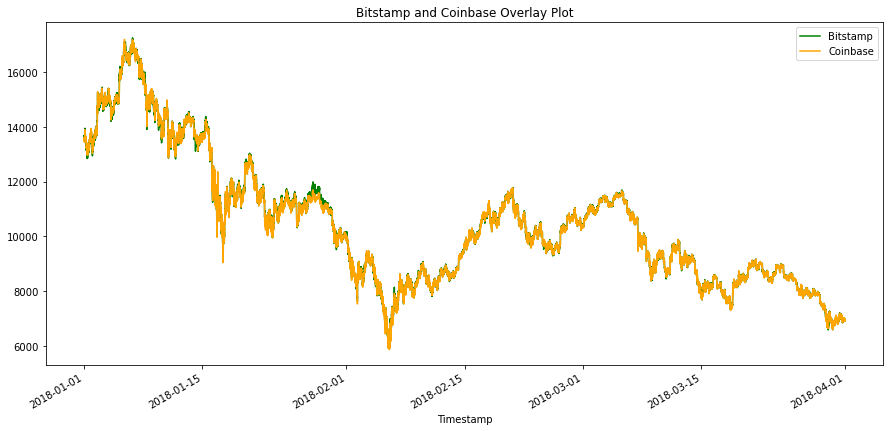

In [22]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.plot(legend=True, figsize=(15, 7), title="Bitstamp and Coinbase Overlay Plot", color="green", label="Bitstamp")
coinbase_sliced.plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

The above graph shows an overlay plot of the bitstamp and coinbase close prices over the course of four months, January 1, 2018 through April 1, 2018. 

<AxesSubplot:title={'center':'Jan through Feb Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

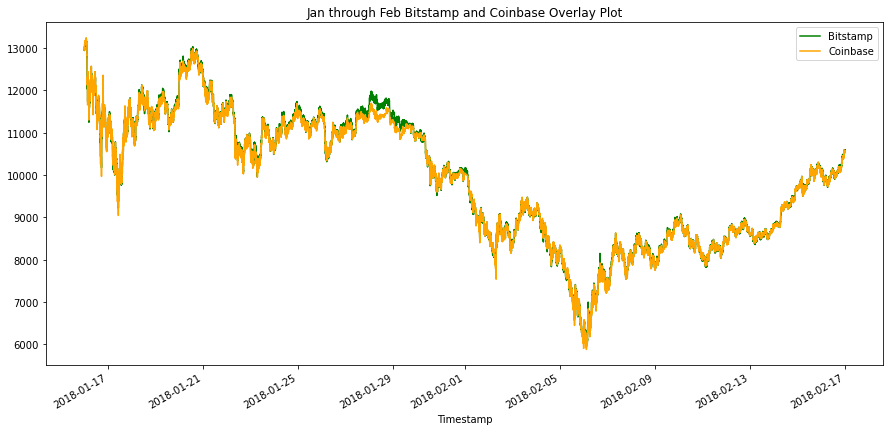

In [23]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp_sliced.loc['2018-01-16': '2018-02-16'].plot(legend=True, figsize=(15, 7), title="Jan through Feb Bitstamp and Coinbase Overlay Plot", color="green", label="Bitstamp")
coinbase_sliced.loc['2018-01-16': '2018-02-16'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

The above graph shows an overlay plot of the close prices of bitstamp and coinbase from January 16, 2018 through February 16, 2018. This is one month of data from early in the original Dataset. 

<AxesSubplot:title={'center':'March through April Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

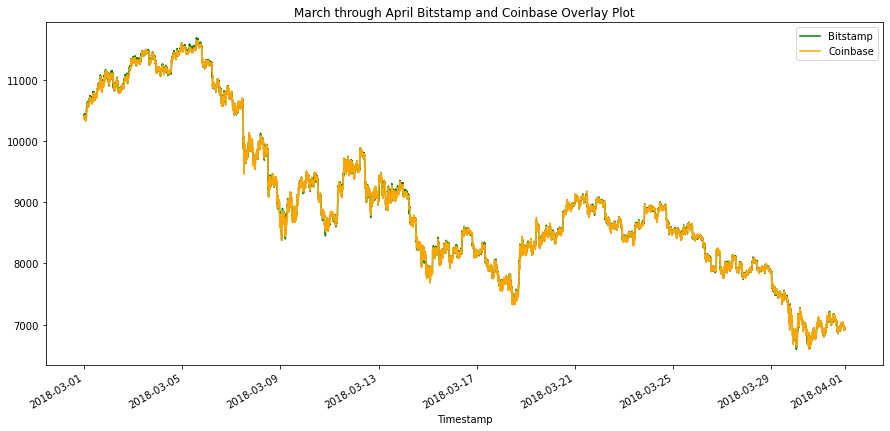

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp_sliced.loc['2018-03-01': '2018-04-01'].plot(legend=True, figsize=(15, 7), title="March through April Bitstamp and Coinbase Overlay Plot", color="green", label="Bitstamp")
coinbase_sliced.loc['2018-03-01': '2018-04-01'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

The above graph shows an overlay plot of the close prices of bitstamp and coinbase from March 1, 2018 through April 1, 2018. This is one month of data from early in the original Dataset. 

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** 
#For the most part, it looks like there were more pockets of time periods where there was a greater spread than later on in the data set. For example, the first visual with data from January through February showed some more gaps between the Bitstamp and Coinbase graphs than the second visual with data from March through April where the graphs practically overlapped each other. 

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 9th 2018 Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

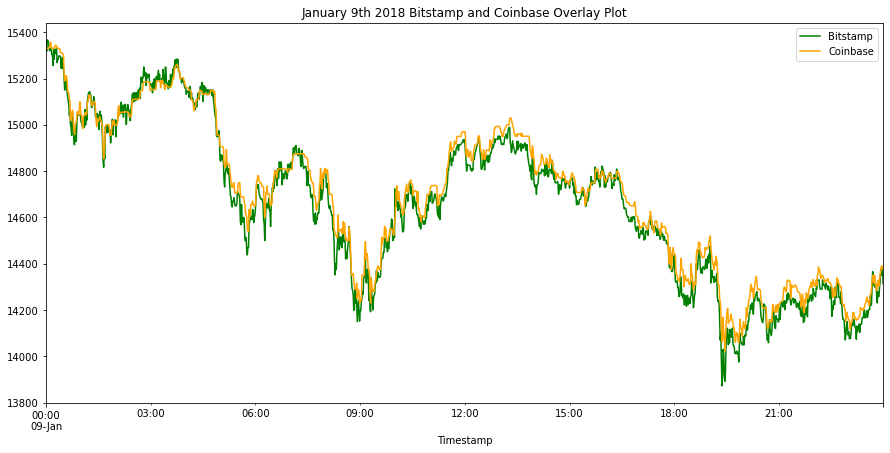

In [135]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-01-09'].plot(legend=True, figsize=(15, 7), title="January 9th 2018 Bitstamp and Coinbase Overlay Plot", color="green", label="Bitstamp")
coinbase_sliced.loc['2018-01-09'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [128]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = abs(coinbase_sliced.loc['2018-01-09'] - bitstamp_sliced.loc['2018-01-09'])

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       42.998125
std        29.435814
min         0.000000
25%        21.042500
50%        39.465000
75%        60.382500
max       189.610000
Name: Close, dtype: float64

The above plot shows data on January 9, 2018 for bitstamp and coinbase. Then the arbitrage spread is calculating the absolute value of the difference/spread between bitstamp and coinbase for that day. 
The describe function generates the summary statistics for the dataframe for January 9th 2018. 

<AxesSubplot:>

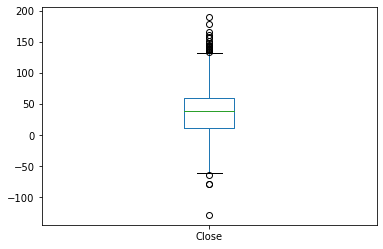

In [129]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early = coinbase_sliced.loc['2018-01-09'] - bitstamp_sliced.loc['2018-01-09']
arbitrage_spread_early.plot(kind ="box")

<AxesSubplot:title={'center':'February 20th 2018 Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

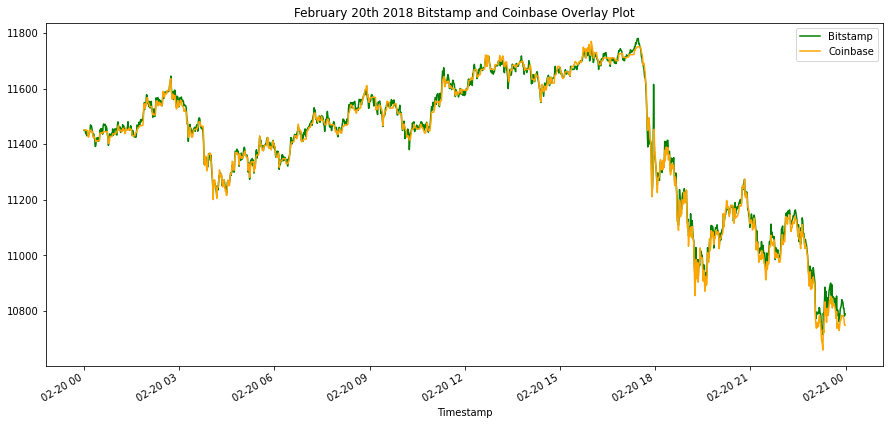

In [130]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-02-20'].plot(legend=True, figsize=(15, 7), title="February 20th 2018 Bitstamp and Coinbase Overlay Plot", color="green", label="Bitstamp")
coinbase_sliced.loc['2018-02-20'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [131]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = abs(coinbase_sliced.loc['2018-02-20'] - bitstamp_sliced.loc['2018-02-20'])

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1439.000000
mean       13.651508
std        12.793252
min         0.000000
25%         4.925000
50%        11.040000
75%        18.910000
max       254.000000
Name: Close, dtype: float64

The above plot shows data on February 20, 2018 for bitstamp and coinbase. Then the arbitrage spread is calculating the absolute value of the difference/spread between bitstamp and coinbase for that day. 
The describe function generates the summary statistics for the dataframe for February 20th 2018. 

<AxesSubplot:>

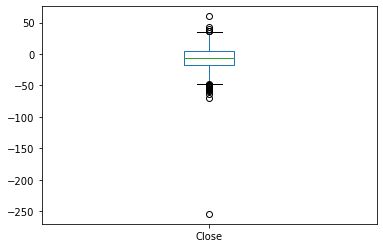

In [132]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle = coinbase_sliced.loc['2018-02-20'] - bitstamp_sliced.loc['2018-02-20']
arbitrage_spread_middle.plot(kind ="box")

<AxesSubplot:title={'center':'March 20rd 2018 Bitstamp and Coinbase Overlay Plot'}, xlabel='Timestamp'>

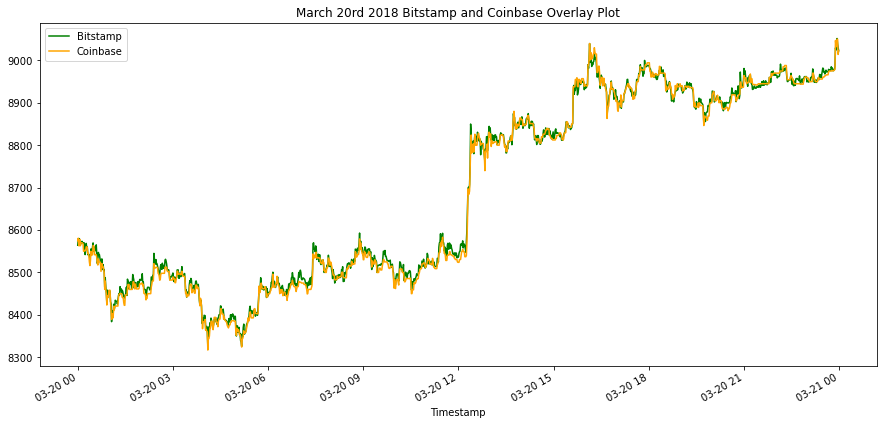

In [133]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp_sliced.loc['2018-03-20'].plot(legend=True, figsize=(15, 7), title="March 20rd 2018 Bitstamp and Coinbase Overlay Plot", color="green", label="Bitstamp")
coinbase_sliced.loc['2018-03-20'].plot(legend=True, figsize=(15, 7), color="orange", label="Coinbase")

In [134]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = abs(coinbase_sliced.loc['2018-03-20'] - bitstamp_sliced.loc['2018-03-20'])

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1432.000000
mean        8.143310
std         6.362757
min         0.000000
25%         3.010000
50%         6.950000
75%        11.852500
max        59.950000
Name: Close, dtype: float64

The above plot shows data on March 20, 2018 for bitstamp and coinbase. Then the arbitrage spread is calculating the absolute value of the difference/spread between bitstamp and coinbase for that day. 
The describe function generates the summary statistics for the dataframe for March 20th 2018. 

<AxesSubplot:>

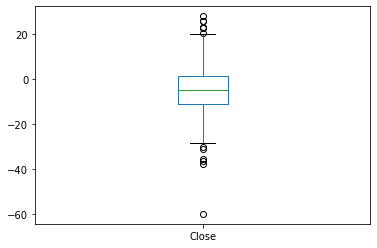

In [85]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late = coinbase_sliced.loc['2018-03-20'] - bitstamp_sliced.loc['2018-03-20']
arbitrage_spread_late.plot(kind ="box")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [35]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = abs(coinbase_sliced.loc['2018-01-09'] - bitstamp_sliced.loc['2018-01-09'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early[arbitrage_spread_early>0].describe()

count    1437.000000
mean       43.087891
std        29.400795
min         0.010000
25%        21.080000
50%        39.900000
75%        60.390000
max       189.610000
Name: Close, dtype: float64

In [97]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = abs(coinbase_sliced.loc['2018-02-20'] - bitstamp_sliced.loc['2018-02-20'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle[arbitrage_spread_middle>0].describe()

count    1436.000000
mean       13.680028
std        12.791366
min         0.010000
25%         4.930000
50%        11.070000
75%        18.922500
max       254.000000
Name: Close, dtype: float64

In [98]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = abs(coinbase_sliced.loc['2018-03-20'] - bitstamp_sliced.loc['2018-03-20'])

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late[arbitrage_spread_late>0].describe()

count    1428.000000
mean        8.166120
std         6.357024
min         0.010000
25%         3.045000
50%         6.960000
75%        11.895000
max        59.950000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [99]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early= arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced.loc['2018-01-09']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-09 00:00:00    0.002019
2018-01-09 00:01:00    0.000806
2018-01-09 00:02:00    0.002380
2018-01-09 00:03:00    0.002327
2018-01-09 00:04:00    0.001692
                         ...   
2018-01-09 23:55:00    0.000762
2018-01-09 23:56:00    0.001675
2018-01-09 23:57:00    0.002787
2018-01-09 23:58:00    0.000628
2018-01-09 23:59:00    0.004197
Name: Close, Length: 1440, dtype: float64

In [100]:
# For the date in the middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle= arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced.loc['2018-02-20']

# Review the spread return DataFrame
spread_return_middle

Timestamp
2018-02-20 00:00:00    0.000118
2018-02-20 00:01:00    0.000094
2018-02-20 00:02:00    0.000048
2018-02-20 00:03:00    0.001068
2018-02-20 00:04:00    0.000046
                         ...   
2018-02-20 23:55:00    0.004633
2018-02-20 23:56:00    0.002680
2018-02-20 23:57:00    0.003700
2018-02-20 23:58:00    0.003065
2018-02-20 23:59:00    0.003857
Name: Close, Length: 1439, dtype: float64

In [101]:
# For the date later in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late= arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced.loc['2018-03-20']

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-20 00:00:00    0.001263
2018-03-20 00:01:00    0.000152
2018-03-20 00:02:00    0.001399
2018-03-20 00:03:00    0.001956
2018-03-20 00:04:00    0.000562
                         ...   
2018-03-20 23:55:00    0.001232
2018-03-20 23:56:00    0.000184
2018-03-20 23:57:00    0.001251
2018-03-20 23:58:00    0.001854
2018-03-20 23:59:00    0.000092
Name: Close, Length: 1432, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [102]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head(5)

Timestamp
2018-01-09 05:42:00    0.010741
2018-01-09 05:45:00    0.010450
2018-01-09 08:17:00    0.012501
2018-01-09 19:03:00    0.010354
2018-01-09 19:19:00    0.011740
Name: Close, dtype: float64

In [103]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head(5)

Timestamp
2018-02-20 17:57:00    0.021868
Name: Close, dtype: float64

In [104]:
# For the date later in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head(5)

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [105]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    9.000000
mean     0.011394
std      0.001133
min      0.010238
25%      0.010450
50%      0.011339
75%      0.011740
max      0.013668
Name: Close, dtype: float64

In [106]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    1.000000
mean     0.021868
std           NaN
min      0.021868
25%      0.021868
50%      0.021868
75%      0.021868
max      0.021868
Name: Close, dtype: float64

In [107]:
# For the date later in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In the early dataset the average return/mean was around 0.01, the average return/mean in the  middle dataset was 0.02 and for the late dataset since there were not enough records where the spread return 
was greater than 1%, the mean is indicating 0. Therefore it seems like the average returns decline over time within this four month timeframe. 

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [52]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced.loc['2018-01-09']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-09 05:42:00    155.75
2018-01-09 05:45:00    151.00
2018-01-09 08:17:00    179.41
2018-01-09 19:03:00    148.23
2018-01-09 19:19:00    165.18
2018-01-09 19:22:00    189.61
2018-01-09 19:23:00    157.81
2018-01-09 19:26:00    160.29
2018-01-09 19:28:00    142.62
Name: Close, dtype: float64

In [53]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp_sliced.loc['2018-02-20']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle

Timestamp
2018-02-20 17:57:00    254.0
Name: Close, dtype: float64

In [108]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp_sliced.loc['2018-03-20']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [109]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count      9.000000
mean     161.100000
std       15.058148
min      142.620000
25%      151.000000
50%      157.810000
75%      165.180000
max      189.610000
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Early Bitcoin Profits'}, xlabel='Timestamp'>

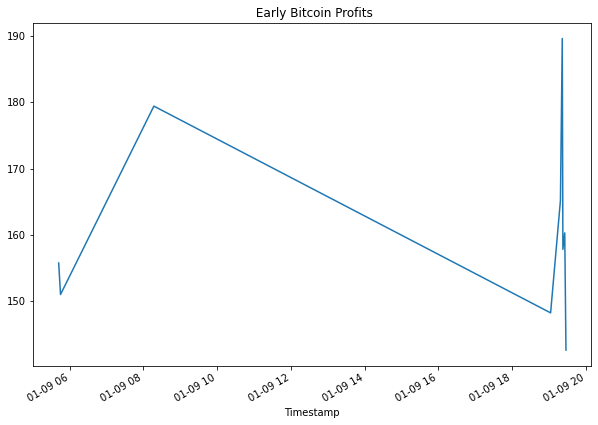

In [110]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(figsize=(10, 7), title=" Early Bitcoin Profits")

In [111]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count      1.0
mean     254.0
std        NaN
min      254.0
25%      254.0
50%      254.0
75%      254.0
max      254.0
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Middle Bitcoin Profits'}, xlabel='Timestamp'>

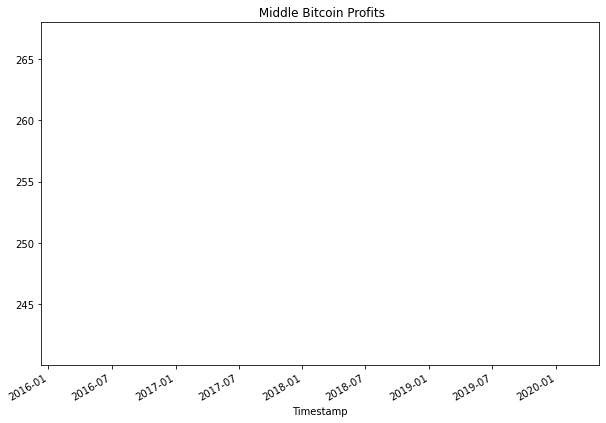

In [112]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(figsize=(10, 7), title=" Middle Bitcoin Profits")

The graph above is blank since there is only one point, one point of data where there was some profit, therefore there were not enough points to create a line plot since there was no profit over that day.

In [113]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':' Late Bitcoin Profits'}, xlabel='Timestamp'>

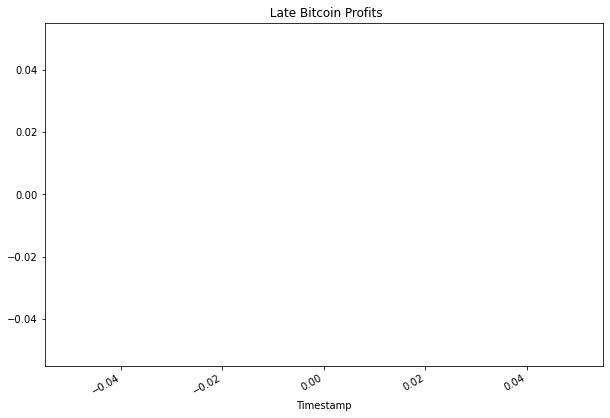

In [114]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(figsize=(10, 7), title=" Late Bitcoin Profits")

The graph above is blank since there was no profit per trade in this late dataframe.

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [115]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()

1449.8999999999978

In [116]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()

254.0

In [117]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()

0.0

Looking at the the sum of the potential profits for the early, middle and late dataframe, we can see that the profit per trade declined over time, where even by March 20th, 2018 there is 0 profit/day. 

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [118]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()

<AxesSubplot:title={'center':'Cumulative Early Profits'}, xlabel='Timestamp'>

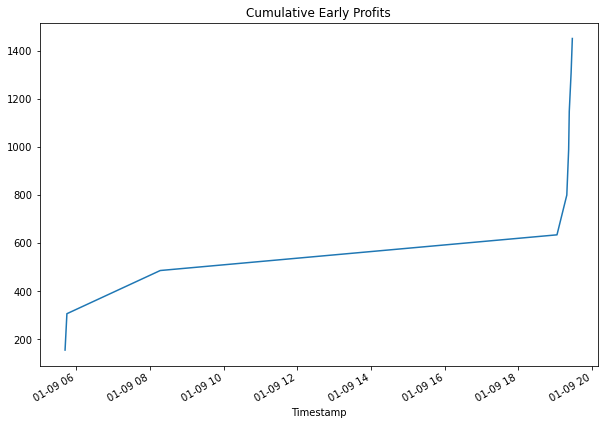

In [136]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Early Profits")

In [70]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Middle Profits'}, xlabel='Timestamp'>

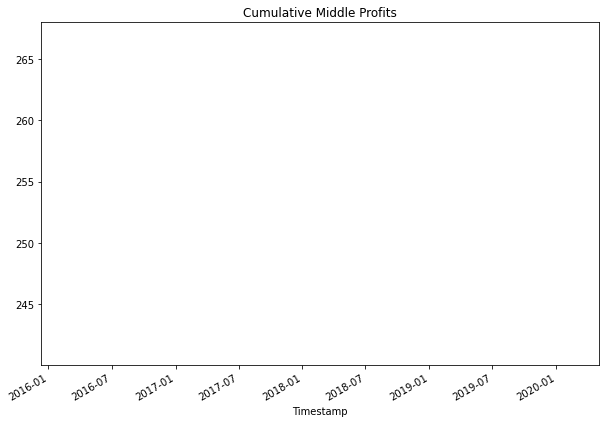

In [137]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(10, 7), title="Cumulative Middle Profits")

In [122]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Late Profits'}, xlabel='Timestamp'>

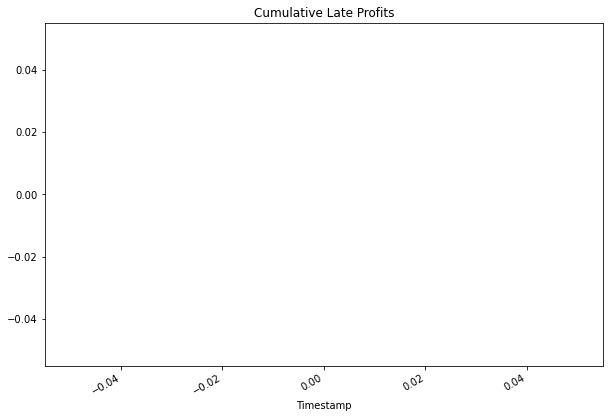

In [138]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_late.plot(figsize=(10, 7), title="Cumulative Late Profits")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** We can see that profit goes down over the course of time within the four month time period of January 1, 2018 through April 1, 2018. From the Overlay plot of Bitstamp and Coinbase over this time period we could see they both followed the same general trajectory of close prices. However, using arbitrage, we were able to calculate arbitrage spread and eventually profit at specific dates within that time (pinpointing early, middle and later in the timeframe). Utilizing spread returns, we indicated profitable trades as having a spread return greater than 1 percent. Using that benchmark we were able to identify later in the dataframe, there was 0 profit per trade, which was a factor the cumulative sums were postively correlated to. At the beginning of the timeframe, the date in January indicated relatively high profit per trade and therefore high cumulative profit for that day. In the middle and late dataframes, we can see the profit per trade go down dramatically and by the late dataframe there is 0 cumulative profit. 